Exploratory_data_Analysis_on_Titanic_dataset

Upload Dataset in Colab

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload files (train.csv is main dataset)
uploaded = files.upload()


Saving train.csv to train.csv


Step 1 — Load Data


In [5]:
# Show the first 5 rows of the dataset
print("🔹 First 5 rows of the dataset (head):")
df = pd.read_csv('train.csv')
print(df.head())

# Show the last 5 rows of the dataset
print("\n🔹 Last 5 rows of the dataset (tail):")
print(df.tail())

# Shape of dataset (rows, columns)
print("\n🔹 Shape of the dataset (rows, columns):")
print(df.shape)

# Column names
print("\n🔹 List of column names:")
print(df.columns.tolist())

# Index information
print("\n🔹 Index range of the dataset:")
print(df.index)

# Info about datatypes and missing values
print("\n🔹 Dataset information (data types, non-null counts):")
print(df.info())

# Summary statistics of numerical columns
print("\n🔹 Summary statistics of numerical features:")
print(df.describe())

🔹 First 5 rows of the dataset (head):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

Step 3 — Missing Values

In [6]:
print("Missing values per column:")
df.isnull().sum()


Missing values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Step 4 — Handle Missing Data

In [7]:
# Fill Embarked with mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Create "HasCabin" flag instead of dropping completely
if 'Cabin' in df.columns:
  df['HasCabin'] = df['Cabin'].notnull().astype(int)

  # Drop Cabin column (too many missing values)
  df = df.drop(columns=['Cabin'])

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Step 5 — Univariate Analysis (Single Columns)

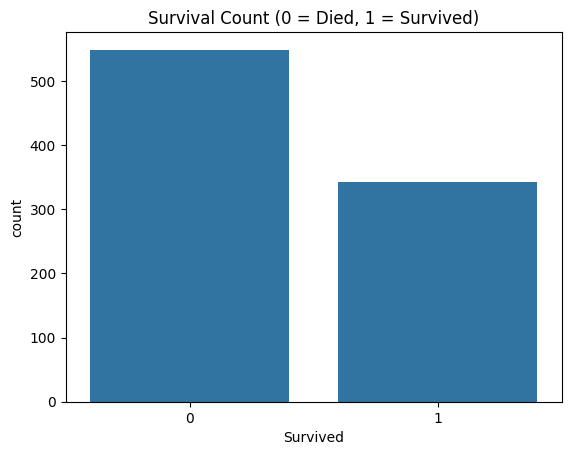

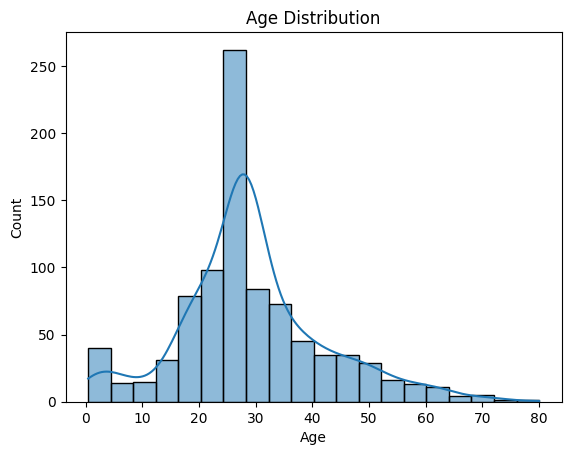

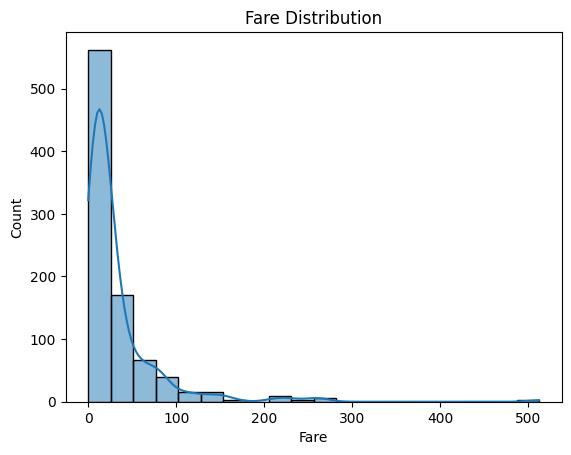

In [8]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(df['Fare'], bins=20, kde=True)
plt.title("Fare Distribution")
plt.show()


Step 6 — Bivariate Analysis (Comparisons)

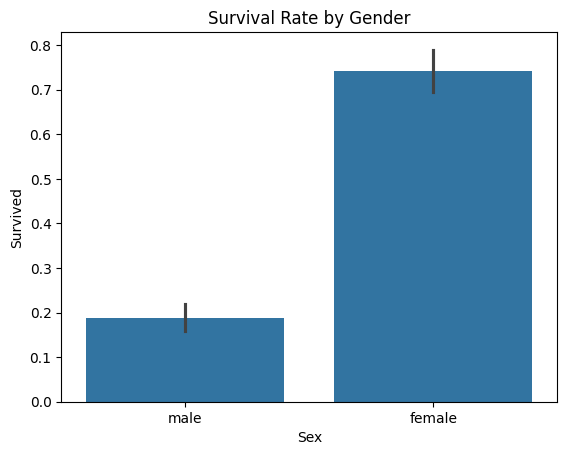

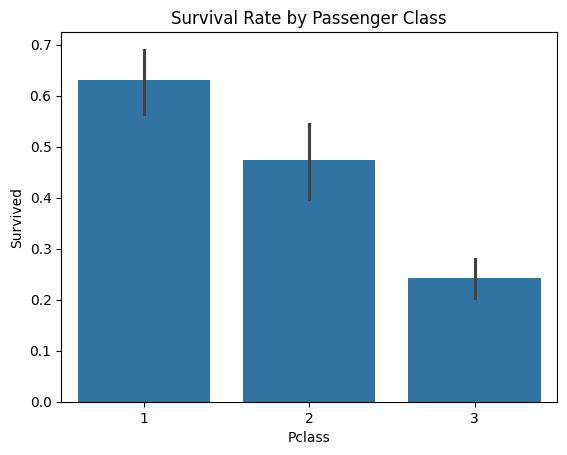

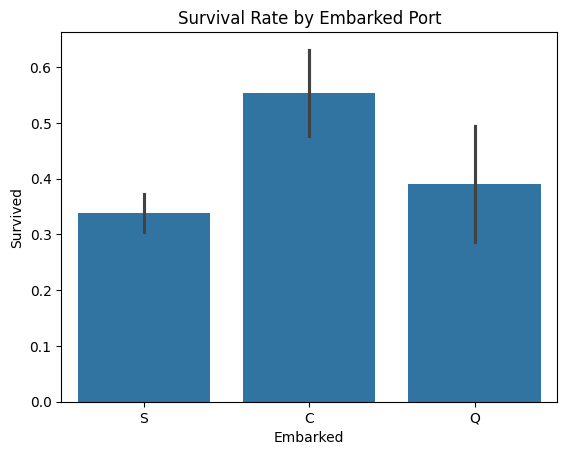

In [9]:
# Survival by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()


Adding Percentages to Bar Plots

/tmp/ipython-input-833033547.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x, y=y, data=data, ci=None)


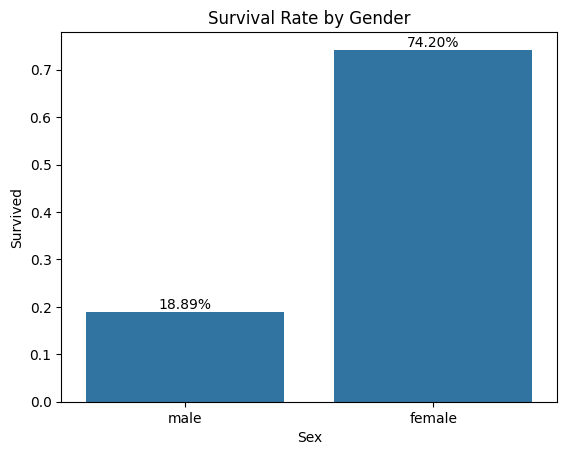

/tmp/ipython-input-833033547.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x, y=y, data=data, ci=None)


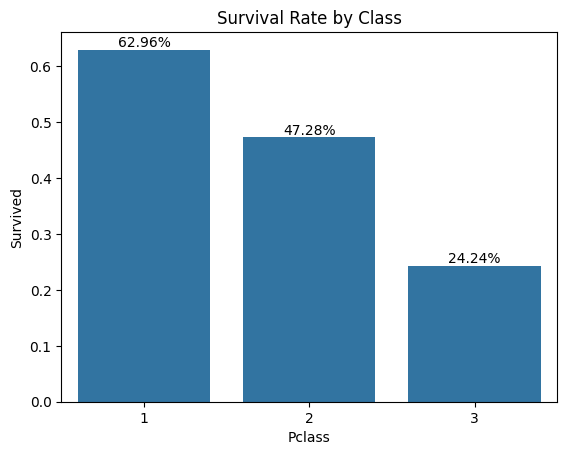

/tmp/ipython-input-833033547.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=x, y=y, data=data, ci=None)


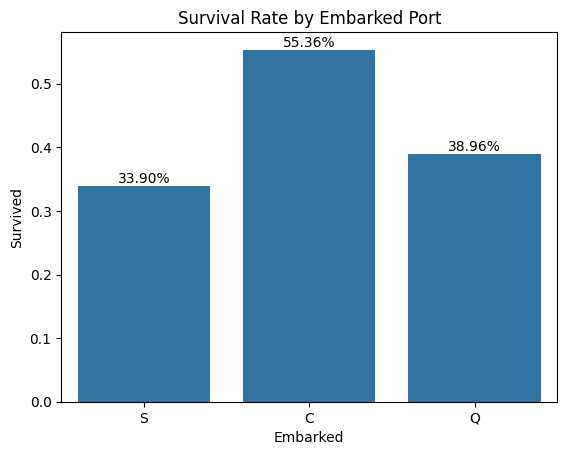

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_with_percentages(x, y, data, title):
    ax = sns.barplot(x=x, y=y, data=data, ci=None)
    plt.title(title)

    # Add percentage labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100:.2f}%",
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')
    plt.show()

# Example usage:
plot_with_percentages("Sex", "Survived", df, "Survival Rate by Gender")
plot_with_percentages("Pclass", "Survived", df, "Survival Rate by Class")
plot_with_percentages("Embarked", "Survived", df, "Survival Rate by Embarked Port")


Countplot (shows counts instead of rates)

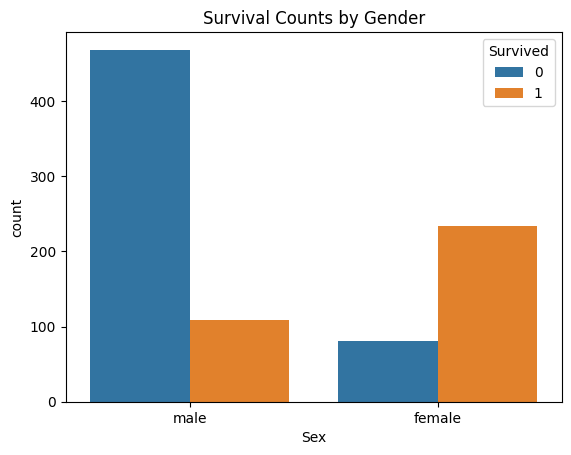

In [11]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Counts by Gender")
plt.show()


Heatmap (Survival rate by 2 variables)

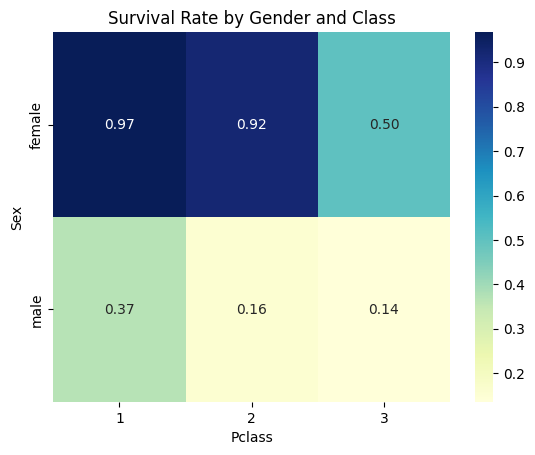

In [12]:
pivot = df.pivot_table(index="Sex", columns="Pclass", values="Survived", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate by Gender and Class")
plt.show()


Step 7 — Correlation Heatmap

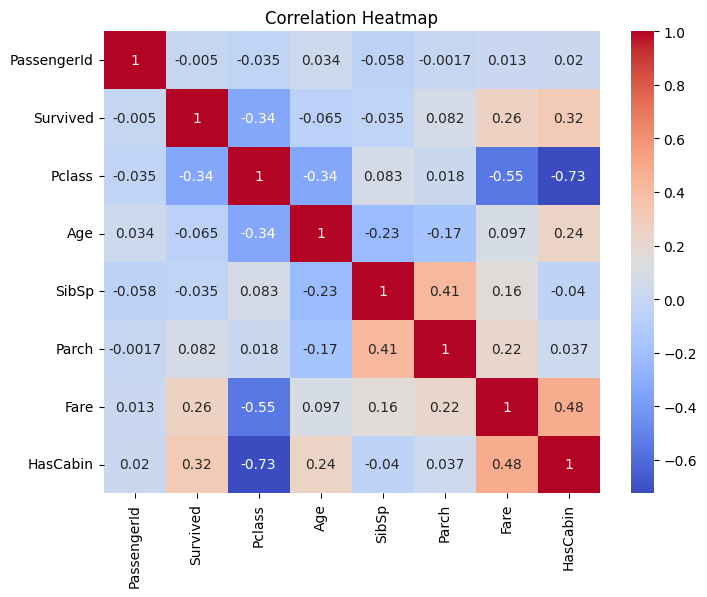

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Name', 'Ticket']).corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()